## Data Fitting

Data fitting is one of optimization problems that finds a best fitting line for data <br>

Consider we have experiment data with inputs and outputs. The x is the indepent variable or input to the experiment. The y is the dependent variable or measured value of the experiment. The exact form of the function that represents the exeperiment measurement of inputs to output is not known. However, we can approximate the function with a well-known form of functions.

*Data fitting* first defines the functional form of the mapping, so called basis fucntion or objective function. Then searching for the parametrs to the function with minimum errors. 

Error is calculated by using the observations from the domain and passing the inputs to our candidate mapping function and calculating the output, then comparing the calculated output to the observed output.

Once finding the best fitting function parameters, then we can use the mapping function to interpolate or extrapolate new points in the domain. 

Therefore, the key to the data fitting is finding the form of the mapping function.

### Least squares

The least square methods is a regression analysis to approximate the mapping function by minimizing the sum of the squares of the residuals.

The fitting a data point is calculated by its residual, defined as the difference between the observed value of the dependent variable and the value predicted by the mapping function: <br>

$$
r_{i} = y_{i} - f(x_i)
$$

Then the least square method find the optimal parameter values by minimizing the sum of squared residuals: <br>

$$
S = \displaystyle\sum\limits_{i=1}^{n} r_{i}^{2}
$$

### Linear regression

$$
y = a * x + b
$$

Where y is the calculated output, $x$ is the input, and $a$ and $b$ are parameters of the mapping function found using an optimization algorithm.

### Polynomial regression

$$
y = a \times x + b \times x^2 + c
$$

This is called polynomial regression, and the squared term means it is a second-degree polynomial.

Linear equations of this type can be fit by minimizing least squares and can be calculated analytically. This means we can find the optimal values of the parameters using a little linear algebra.

### Nonlinear least squares

The mapping function can be other mathematical functions to the equation, such as sine, cosine, and more. for example,<br>

$$
y = a \times \sin(b \times x) + c
$$

Adding arbitrary mathematical functions to our mapping function generally means we cannot calculate the parameters analytically, and instead, we will need to use an iterative optimization algorithm.

### Example

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.loadtxt('data.txt')
x, y = data[:, 0], data[:, 1]
print (x)
print (y)

[107.608 108.632 109.773 110.929 112.075 113.27  115.094 116.219 117.388
 118.734 120.445 121.95  123.366 125.368 127.852 130.081]
[60.323 61.122 60.171 61.187 63.221 63.639 64.989 63.761 66.019 67.857
 68.169 66.513 68.655 69.564 69.331 70.551]


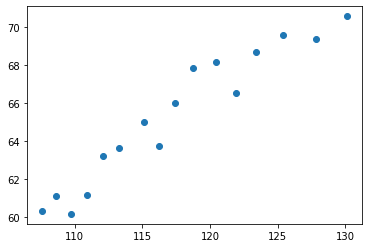

In [3]:
plt.scatter(x, y)
plt.show()

We will use curve_fit module of scipy package.

In [5]:
from scipy.optimize import curve_fit

$$
y = ax + b
$$

In [6]:
# Define the model function
def linemap(x, a, b):
    return (a * x + b)

In [8]:
opt, cov = curve_fit(linemap, x, y)
print (opt)
print (cov)

[0.48487809 8.38067476]
[[ 1.41378134e-03 -1.66011861e-01]
 [-1.66011861e-01  1.95579106e+01]]


In [9]:
a, b = opt
print ('y = %.5f * x + %.5f' % (a, b))

y = 0.48488 * x + 8.38067


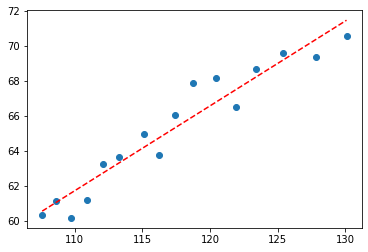

In [10]:
plt.scatter(x, y)
plt.plot(x, a*x+b, 'r--')
plt.show()

$$
y = ax^2 + bx + c
$$

In [11]:
def polymap(x, a, b, c):
    return (a*x**2 + b*x + c)

In [12]:
opt, _ = curve_fit(polymap, x, y)
a, b, c = opt
print ('y = %.5f * x^2 + %.5f * x + %.5f' % (a, b, c))

y = -0.01170 * x^2 + 3.25444 * x + -155.02799


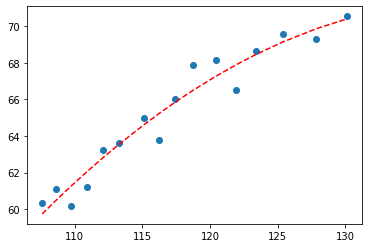

In [13]:
plt.scatter(x, y)
plt.plot(x, a*x**2+b*x+c, 'r--')
plt.show()

$$
y = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g
$$

In [14]:
def sixthmap(x, a, b, c, d, e, f, g):
    return (a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g)

In [1]:
opt, _ = curve_fit(sixthmap, x, y)
a, b, c, d, e, f, g = opt
print ('y = %.5f * x^6 + %.5f * x^5 + %.5f * x^4 + %.5f * x^3 + %.5f * x^2 + %.5f * x + %.5f' % (a, b, c, d, e, f, g))

NameError: name 'curve_fit' is not defined

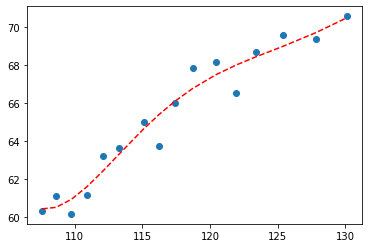

In [16]:
plt.scatter(x, y)
plt.plot(x, sixthmap(x, a, b, c, d, e, f, g), 'r--')
plt.show()

$$
y = a \sin(b - x) + c x + d
$$

In [17]:
def arbmap(x, a, b, c, d):
    return a * np.sin(b - x) + c * x + d

In [18]:
opt, _ = curve_fit(arbmap, x, y)
a, b, c, d = opt
print ('%.5f * sin(%.5f - x) + %.5f * x + %.5f' % (a, b, c, d))

0.88224 * sin(1.50386 - x) + 0.49040 * x + 7.81710


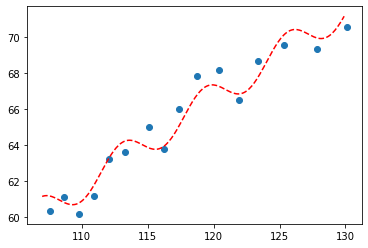

In [19]:
plt.scatter(x, y)
u = np.arange(107, 130, 0.1)
plt.plot(u, arbmap(u, a, b, c, d), 'r--')
plt.show()

$$
a \exp \Big[ \frac{(x-b)^{2}}{2c^2} \Big]
$$

In [20]:
def gaussmap(x, a, b, c):
    return (a * np.exp(- (x - b)**2 / (2 * c**2)))

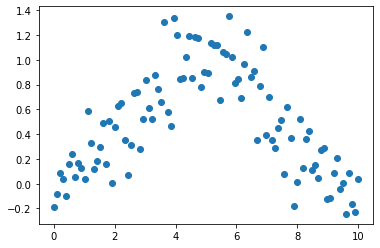

In [23]:
x = np.linspace(0, 10, 100)
y = gaussmap(x, 1, 5, 2)
yr = y + 0.2*np.random.normal(size=len(x))
plt.plot(x, yr, 'o')
plt.show()

In [24]:
opt, _ = curve_fit(gaussmap, x, yr)
a, b, c = opt
print ('%.5f * exp(- (x - %.5f)^2 / 2%.5f^2)' % (a, b, c))

1.06681 * exp(- (x - 4.90848)^2 / 21.90159^2)


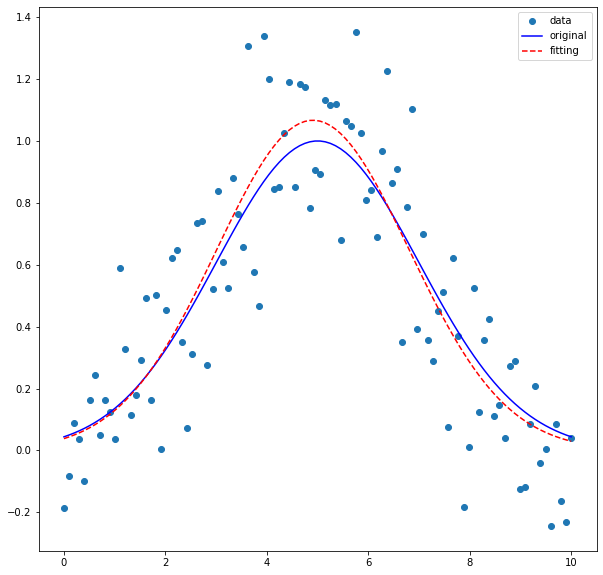

In [25]:
plt.figure(figsize=(10,10))
plt.plot(x, yr, 'o', label='data')
plt.plot(x, y, 'b-', label='original')
plt.plot(x, gaussmap(x, a, b, c), 'r--', label='fitting')
plt.legend(loc='best')
plt.show()